In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz

In [4]:
def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph

In [5]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [7]:
penguins = sns.load_dataset("penguins")

In [21]:
# Drop rows with missing values
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [22]:
penguins_train, penguins_test = train_test_split(penguins, test_size=0.3, stratify=penguins['species'])

In [23]:
print(penguins_train.shape, penguins_test.shape)

(233, 7) (100, 7)


In [32]:
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
dt_classification = DecisionTreeClassifier(max_depth=10)
dt_classification.fit(penguins_train[features], penguins_train['sex'])

DecisionTreeClassifier(max_depth=10)

In [33]:
predictionsOnTrainset = dt_classification.predict(penguins_train[features])
predictionsOnTestset = dt_classification.predict(penguins_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, penguins_train.sex)
accuracyTest = calculate_accuracy(predictionsOnTestset, penguins_test.sex)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 1.0
Accuracy on test set 0.79


The decision tree algorithm is able to predict with an accuracy of 100% when tested on the data which was used to train it.
However, when the other 30% of the data, the test data, is used, the accuracy drops to 79%. This is likely because this data was not yet seen by the algorithm whereas the training data obviously was.

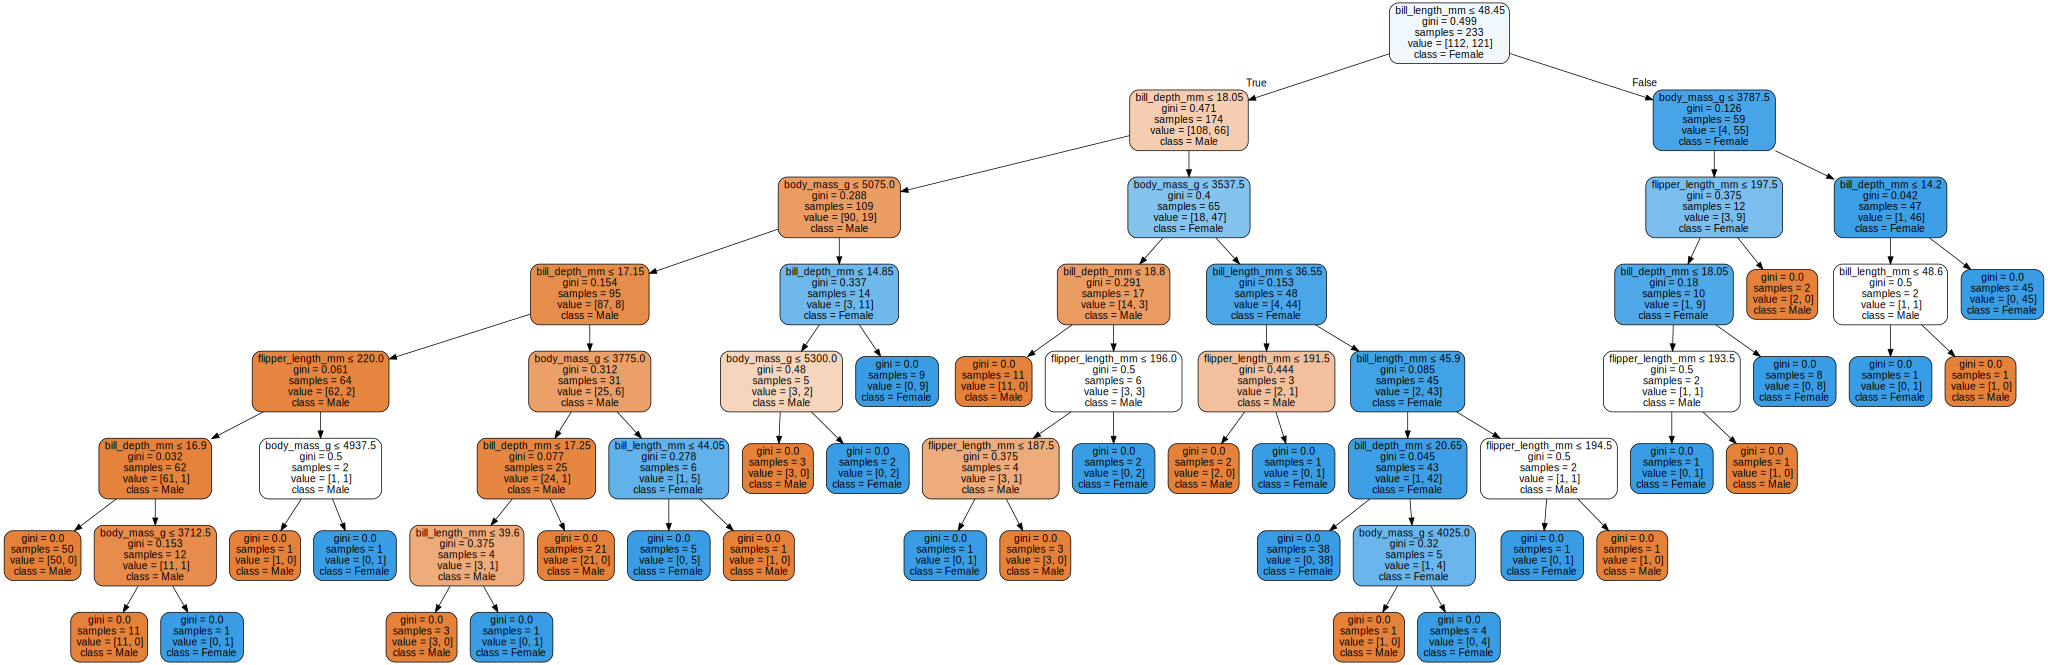

In [35]:
plot_tree_classification(dt_classification, features, penguins.sex.unique())

The core concept of the decision tree is understandable. However, the tree itself is so big, that it is quite difficult to oversee it as a whole.

It is clear that the algorithm keeps making a decision node if it hasn't yet reached its max depth, and the samples don't all have the same result at the current node. It tries to pick a decision that devides the samples in a way that splits the result (e.g: only draws on one side, only mates on the other), the algorithm keeps doing this, until the whole sample belongs to a single class (one result, draw for example), or until max depth of the desicion tree is reached.

The result of a given node, is given by the class that is most abundant in its sample.